In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sb
%matplotlib inline

In [49]:
df = pd.read_csv('covid_surveillance06.16.20.csv')

## Gathering Data

In [3]:
df.head()

,record_id,redcap_event_name,redcap_survey_identifier,covid19_surveillance_survey_timestamp,languages,uuid,timestamp,zipcode,age_person1,gender_person1,...,symptoms___11,symptoms___12,symptoms___13,symptoms___14,symptoms___15,symptoms___16,symptoms___17,symptoms___18,scale,sick_checkin_complete
0,14,event_1_arm_1,NaN,NaN,1.0,3DIMHTKIJE,NaN,85719.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,event_1_arm_1,NaN,NaN,1.0,1CSNRPGW0I,NaN,85701.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,event_1_arm_1,NaN,2020-04-05 06:35:48,1.0,5DV83RLPVK,NaN,85745.0,45.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21,event_2_arm_1,NaN,2020-04-20 12:47:34,1.0,NaN,2020-04-20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,event_3_arm_1,NaN,2020-04-27 10:24:34,1.0,NaN,2020-04-27,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(12071, 785)

In [50]:
df.info([0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12071 entries, 0 to 12070
Data columns (total 785 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   record_id                              int64  
 1   redcap_event_name                      object 
 2   redcap_survey_identifier               float64
 3   covid19_surveillance_survey_timestamp  object 
 4   languages                              float64
 5   uuid                                   object 
 6   timestamp                              object 
 7   zipcode                                float64
 8   age_person1                            float64
 9   gender_person1                         float64
 10  ethnicity                              float64
 11  race                                   float64
 12  veteran                                float64
 13  veteran_number                         float64
 14  work_person1                           float64
 15  p

In [6]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

is_string_dtype(df['timestamp'])

## timestamp is a string, should convert to datetime

True

In [7]:
## timestamp column converted to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y/%m/%d", errors = 'ignore')
df["timestamp"]

0              NaT
1              NaT
2              NaT
3       2020-04-20
4       2020-04-27
           ...    
12066          NaT
12067          NaT
12068   2020-06-16
12069   2020-06-16
12070   2020-06-16
Name: timestamp, Length: 12071, dtype: datetime64[ns]

In [8]:
df['timestamp'].dt.month_name().str[:]

0          NaN
1          NaN
2          NaN
3        April
4        April
         ...  
12066      NaN
12067      NaN
12068     June
12069     June
12070     June
Name: timestamp, Length: 12071, dtype: object

In [9]:
# True = number of null timestamps
df["timestamp"].isnull().value_counts()

False    11640
True       431
Name: timestamp, dtype: int64

In [10]:
# check for descending order
df["timestamp"].dropna(inplace = False)

3       2020-04-20
4       2020-04-27
5       2020-05-05
6       2020-05-26
8       2020-04-16
           ...    
12064   2020-06-16
12065   2020-06-16
12068   2020-06-16
12069   2020-06-16
12070   2020-06-16
Name: timestamp, Length: 11640, dtype: datetime64[ns]

In [11]:
# total number of households participating
df['household_size'].value_counts().sum()

2902

In [12]:
# distribution of households by size
df['household_size'].value_counts()

2.0     1305
1.0      516
3.0      439
4.0      376
5.0      160
6.0       61
7.0       26
8.0        8
0.0        7
10.0       2
9.0        1
33.0       1
Name: household_size, dtype: int64

In [13]:
df['health_household'].value_counts()

#examine these by month and week - fix datetime
# sort timestamps in descending order and take first one
# split by 30 and by 7 

1.0    11277
2.0      379
Name: health_household, dtype: int64

## Assessing for monthly household statistics

In [14]:
# Start with single person household
# possibly the number of people sick in a single person household, not accurate
house1=df['symp_date_person1'].value_counts()
house1

2020-04-24    9
2020-04-01    8
2020-04-25    8
2020-04-19    7
2020-04-22    6
             ..
2020-05-20    1
2020-03-17    1
2020-03-24    1
1947-05-27    1
2020-05-07    1
Name: symp_date_person1, Length: 92, dtype: int64

In [15]:
##add table for house1












In [16]:
df[df.household_size == 2].shape[0]

1305

In [17]:
# test script
# total number of person1 sick in household of 2 people - does not match with cell below although it should?
df.loc[df['household_size'] == 2, 'sick_choice_2___1'].sum()

36

In [18]:
#there seems to be a disparity between the total number of person1 feeling sick in a two person household
df['sick_choice_2___1'].sum()

100

In [19]:
#test script
df.loc[df['household_size'] == 2, 'sick_choice_2___2'].sum()

20

In [20]:
# same issue with total number of person2 feeling sick in a two person household, etc.
df['sick_choice_2___2'].sum()

60

In [21]:
# chose to go with script that assumes a higher baseline
# total number of people sick in a 2 person household by month
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
p2_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_2___1'].sum()
p2_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_2___2'].sum()
house2m = p2_1m + p2_2m
house2m.index = pd.CategoricalIndex(house2m.index, categories=months, ordered=True)
house2m = house2m.sort_index()
house2m

timestamp
April    59
May      62
June     38
dtype: int64

In [22]:
# verify sum of people feeling sick in a 2 person household (off by 1 for some reason)
df['sick_choice_2___1'].sum() + df['sick_choice_2___2'].sum()

160

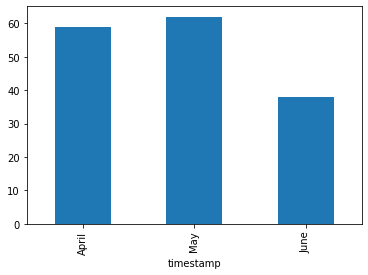

In [23]:
## Graph of total individuals feeling sick in a 2 person household by month
house2m.plot(kind='bar');

In [24]:
# total number of people sick in a 3 person household by month
p3_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_3___1'].sum()
p3_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_3___2'].sum()
p3_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_3___3'].sum()
house3m = p3_1m + p3_2m + p3_3m
house3m.index = pd.CategoricalIndex(house3m.index, categories=months, ordered=True)
house3m = house3m.sort_index()
house3m

timestamp
April    29
May      48
June     14
dtype: int64

In [25]:
# verify sum of people feeling sick in a 3 person household (off by 2)
df['sick_choice_3___1'].sum() + df['sick_choice_3___2'].sum() + df['sick_choice_3___3'].sum()

93

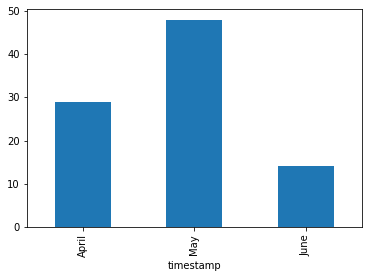

In [26]:
## Graph of total individuals feeling sick in a 3 person household by month
house3m.plot(kind='bar');

In [27]:
# total number of people sick in a 4 person household by month
p4_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_4___1'].sum()
p4_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_4___2'].sum()
p4_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_4___3'].sum()
p4_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_4___4'].sum()
house4m = p4_1m + p4_2m + p4_3m + p4_4m
house4m.index = pd.CategoricalIndex(house4m.index, categories=months, ordered=True)
house4m = house4m.sort_index()
house4m

timestamp
April    23
May      21
June      4
dtype: int64

In [28]:
# verify sum of people feeling sick in a 4 person household (accurate)
df['sick_choice_4___1'].sum() + df['sick_choice_4___2'].sum() + df['sick_choice_4___3'].sum() + df['sick_choice_4___4'].sum()

48

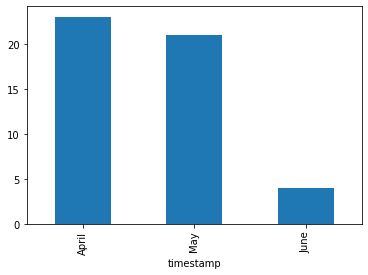

In [29]:
## Graph of total individuals feeling sick in a 4 person household by month
house4m.plot(kind='bar');

In [30]:
# total number of people sick in a 5 person household by month
p5_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_5___1'].sum()
p5_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_5___2'].sum()
p5_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_5___3'].sum()
p5_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_5___4'].sum()
p5_5m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_5___5'].sum()
house5m = p5_1m + p5_2m + p5_3m + p5_4m + p5_5m
house5m.index = pd.CategoricalIndex(house5m.index, categories=months, ordered=True)
house5m = house5m.sort_index()
house5m

timestamp
April     5
May      28
June      9
dtype: int64

In [31]:
# verify sum of people feeling sick in a 5 person household (accurate)
df['sick_choice_5___1'].sum() + df['sick_choice_5___2'].sum() + df['sick_choice_5___3'].sum() + df['sick_choice_5___4'].sum() + df['sick_choice_5___5'].sum()

42

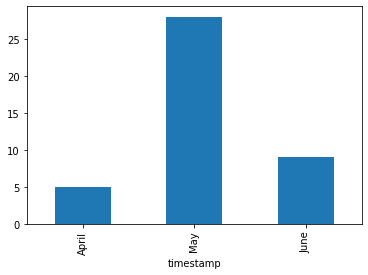

In [32]:
## Graph of total individuals feeling sick in a 5 person household by month
house5m.plot(kind='bar');

In [33]:
# total number of people sick in a 6 person household by month
p6_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_6___1'].sum()
p6_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_6___2'].sum()
p6_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_6___3'].sum()
p6_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_6___4'].sum()
p6_5m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_6___5'].sum()
p6_6m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_6___6'].sum()
house6m = p6_1m + p6_2m + p6_3m + p6_4m + p6_5m + p6_6m
house6m.index = pd.CategoricalIndex(house6m.index, categories=months, ordered=True)
house6m = house6m.sort_index()
house6m

timestamp
April     2
May      10
June      3
dtype: int64

In [34]:
# verify sum of people feeling sick in a 6 person household (accurate)
df['sick_choice_6___1'].sum() + df['sick_choice_6___2'].sum() + df['sick_choice_6___3'].sum() + df['sick_choice_6___4'].sum() + df['sick_choice_6___5'].sum() + df['sick_choice_6___6'].sum()

15

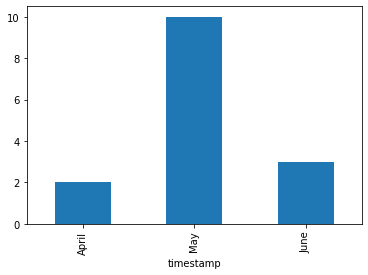

In [35]:
## Graph of total individuals feeling sick in a 6 person household by month
house6m.plot(kind='bar');

In [36]:
# total number of people sick in a 7 person household by month
p7_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___1'].sum()
p7_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___2'].sum()
p7_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___3'].sum()
p7_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___4'].sum()
p7_5m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___5'].sum()
p7_6m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___6'].sum()
p7_7m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_7___7'].sum()
house7m = p7_1m + p7_2m + p7_3m + p7_4m + p7_5m + p7_6m + p7_7m
house7m.index = pd.CategoricalIndex(house7m.index, categories=months, ordered=True)
house7m = house7m.sort_index()
house7m

timestamp
April    1
May      6
June     0
dtype: int64

In [37]:
# verify sum of people feeling sick in a 7 person household (accurate)
df['sick_choice_7___1'].sum() + df['sick_choice_7___2'].sum() + df['sick_choice_7___3'].sum() + df['sick_choice_7___4'].sum() + df['sick_choice_7___5'].sum() + df['sick_choice_7___6'].sum() + df['sick_choice_7___7'].sum()

7

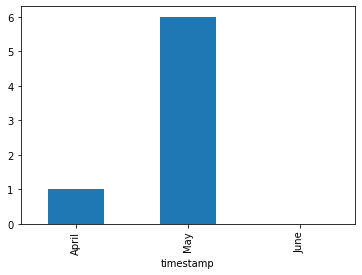

In [38]:
## Graph of total individuals feeling sick in a 7 person household by month
house7m.plot(kind='bar');

In [39]:
# total number of people sick in an 8 person household by month
p8_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___1'].sum()
p8_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___2'].sum()
p8_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___3'].sum()
p8_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___4'].sum()
p8_5m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___5'].sum()
p8_6m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___6'].sum()
p8_7m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___7'].sum()
p8_8m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_8___8'].sum()
house8m = p8_1m + p8_2m + p8_3m + p8_4m + p8_5m + p8_6m + p8_7m + p8_8m
house8m.index = pd.CategoricalIndex(house8m.index, categories=months, ordered=True)
house8m = house8m.sort_index()
house8m

timestamp
April    1
May      0
June     0
dtype: int64

In [40]:
# verify sum of people feeling sick in an 8 person household (accurate)
df['sick_choice_8___1'].sum() + df['sick_choice_8___2'].sum() + df['sick_choice_8___3'].sum() + df['sick_choice_8___4'].sum() + df['sick_choice_8___5'].sum() + df['sick_choice_8___6'].sum() + df['sick_choice_8___7'].sum() + df['sick_choice_8___8'].sum()

1

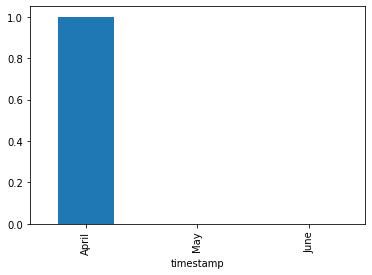

In [41]:
## Graph of total individuals feeling sick in an 8 person household by month
house8m.plot(kind='bar');

In [42]:
# total number of people sick in a 9 person household by month
p9_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___1'].sum()
p9_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___2'].sum()
p9_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___3'].sum()
p9_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___4'].sum()
p9_5m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___5'].sum()
p9_6m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___6'].sum()
p9_7m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___7'].sum()
p9_8m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___8'].sum()
p9_9m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_9___9'].sum()
house9m = p9_1m + p9_2m + p9_3m + p9_4m + p9_5m + p9_6m + p9_7m + p9_8m + p9_9m
house9m.index = pd.CategoricalIndex(house9m.index, categories=months, ordered=True)
house9m = house9m.sort_index()
house9m

timestamp
April    0
May      0
June     0
dtype: int64

In [43]:
# verify sum of people feeling sick in a 9 person household (accurate)
df['sick_choice_9___1'].sum() + df['sick_choice_9___2'].sum() + df['sick_choice_9___3'].sum() + df['sick_choice_9___4'].sum() + df['sick_choice_9___5'].sum() + df['sick_choice_9___6'].sum() + df['sick_choice_9___7'].sum() + df['sick_choice_9___8'].sum() + df['sick_choice_9___9'].sum()

0

In [44]:
# total number of people sick in a 10 or more person household by month
p10_1m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___1'].sum()
p10_2m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___2'].sum()
p10_3m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___3'].sum()
p10_4m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___4'].sum()
p10_5m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___5'].sum()
p10_6m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___6'].sum()
p10_7m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___7'].sum()
p10_8m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___8'].sum()
p10_9m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___9'].sum()
p10_10m = df.groupby(df['timestamp'].dt.month_name().str[:])['sick_choice_10___10'].sum()
house10m = p10_1m + p10_2m + p10_3m + p10_4m + p10_5m + p10_6m + p10_7m + p10_8m + p10_9m + p10_10m
house10m.index = pd.CategoricalIndex(house10m.index, categories=months, ordered=True)
house10m = house10m.sort_index()
house10m

timestamp
April    0
May      1
June     0
dtype: int64

In [45]:
# verify sum of people feeling sick in a household with 10 or more people (off by 10, no bueno)
df['sick_choice_10___1'].sum() + df['sick_choice_10___2'].sum() + df['sick_choice_10___3'].sum() + df['sick_choice_10___4'].sum() + df['sick_choice_10___5'].sum() + df['sick_choice_10___6'].sum() + df['sick_choice_10___7'].sum() + df['sick_choice_10___8'].sum() + df['sick_choice_10___9'].sum() + df['sick_choice_10___10'].sum()

11

## Assessing for weekly household statistics

In [46]:
df.groupby(df['timestamp'].dt.weekofyear)['sick_choice_2___1'].sum()

timestamp
15.0     0
16.0     1
17.0    17
18.0    27
19.0    11
20.0    11
21.0     6
22.0     5
23.0     8
24.0     8
25.0     5
Name: sick_choice_2___1, dtype: int64

In [47]:
# total number of people sick in a 2 person household by week of year
p2_1w = df.groupby(df['timestamp'].dt.week)['sick_choice_2___1'].sum()
p2_2w = df.groupby(df['timestamp'].dt.week)['sick_choice_2___2'].sum()
house2w = p2_1w + p2_2w
house2w

timestamp
15.0     0
16.0     1
17.0    25
18.0    42
19.0    23
20.0    14
21.0     9
22.0     7
23.0    11
24.0    17
25.0    10
dtype: int64